# Compare models: min-move strategy

Games 0-100: Fixed

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
os.chdir('models')

In [2]:
def draw_plots(names):
    results = []
    for name in names:
        dist = np.load(name)
        scores = np.asarray([dist['scores']]).flatten()
        scores.sort()
        results.append(scores)
    
    names=[name[:-4] for name in names]
    results = np.vstack(results)
    print(results.shape)
    logresults = np.log10(results + 1)

    plt.subplots(figsize=(14, 4))
    plt.subplot(131)
    for i in range(len(results)):
        plt.plot(results[i][:50])
    plt.subplot(132)
    for i in range(len(results)):
        plt.plot(results[i])
    plt.legend(names)
    plt.subplot(133)
    for i in range(len(logresults)):
        plt.plot(logresults[i])
    plt.legend(names)
    plt.show()

(3, 1000)


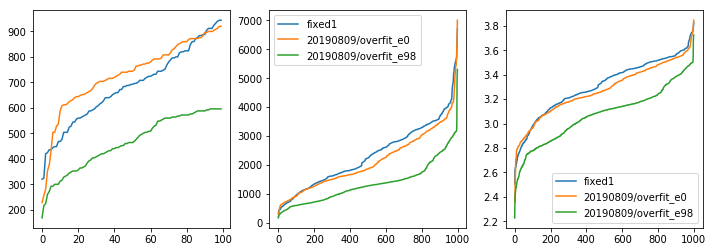

Overfitting on test set does not produce a strong model


In [7]:
# 1cycle policy to overfit test set. (low decay)
results = []
names = ['fixed1.npz',
         '20190809/overfit_e0.npz',
         '20190809/overfit_e98.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

print('Overfitting on test set does not produce a strong model')

(3, 1000)


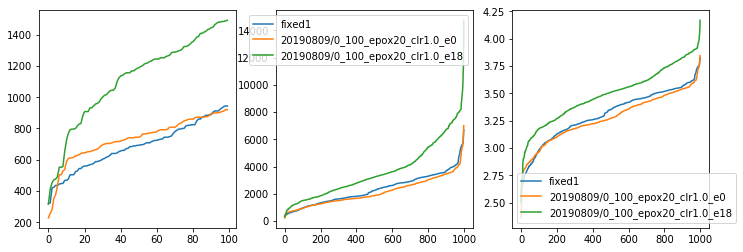

Limited # of epochs to stop overfitting (i.e. early stopping). Model is stronger than fixed!


In [9]:
# Manually pick epochs for 1cycle policy to prevent validation loss from going up.
results = []
names = ['fixed1.npz',
         '20190809/0_100_epox20_clr1.0_e0.npz',
         '20190809/0_100_epox20_clr1.0_e18.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

print('Limited # of epochs to stop overfitting (i.e. early stopping). Model is stronger than fixed!')

(3, 1000)


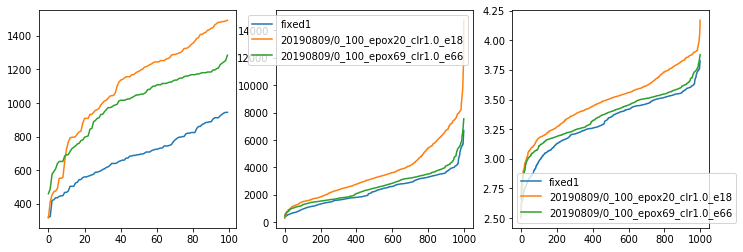

Ks_2sampResult(statistic=0.097, pvalue=0.00016232041211307663)
Ks_2sampResult(statistic=0.228, pvalue=3.4392828740186846e-23)
[3.30919566 3.49190948 3.37007845]


In [14]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190809/0_100_epox20_clr1.0_e18.npz',
         '20190809/0_100_epox69_clr1.0_e66.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(12, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

for i in range(len(logresults)-1):
    print(stats.ks_2samp(logresults[i], logresults[-1]))
print(np.mean(logresults, axis=1))

Ax parameters has better min-dead performance but is weaker overall. Both networks are stronger than Fixed.

## Games 100-200
Generated by `20190809/0_100_epox69_clr1.0_e66`

(4, 1000)


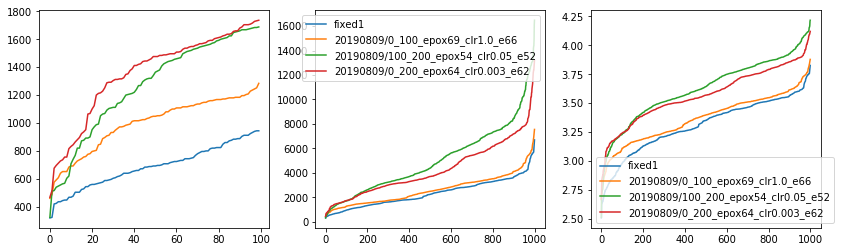

In [7]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190809/0_100_epox69_clr1.0_e66.npz',
         '20190809/100_200_epox54_clr0.05_e52.npz',
         '20190809/0_200_epox64_clr0.003_e62.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:100])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

Both models trained with 100-200 games are stronger than the one trained on initial 0-100 games. Model of 100-200 is very strong, but has weaker initial playing strength than model 0-200, so I will use the latter (despite model likely being overfitted).

## Games 200-300
Generated by `20190809/0_200_epox64_clr0.003_e62`

(4, 1000)


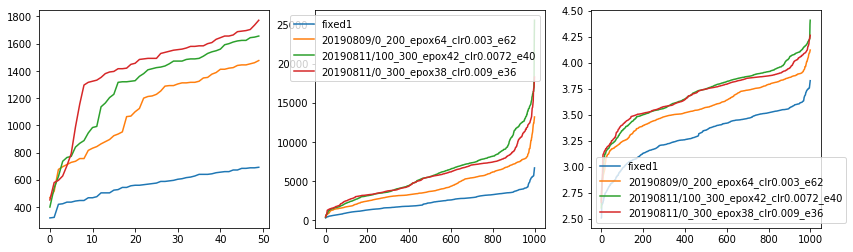

In [6]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190809/0_200_epox64_clr0.003_e62.npz',
         '20190811/100_300_epox42_clr0.0072_e40.npz',
         '20190811/0_300_epox38_clr0.009_e36.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

## Games 400
Generated by `20190811/0_300_epox38_clr0.009_e36`

(5, 1000)


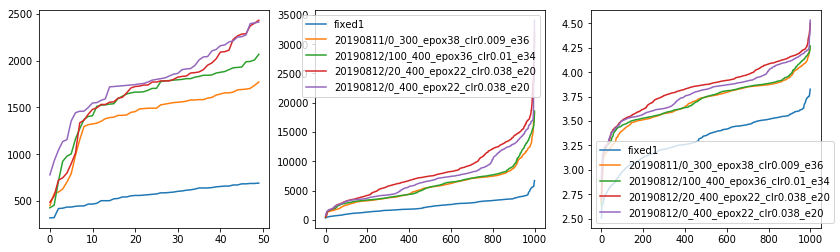

In [5]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190811/0_300_epox38_clr0.009_e36.npz',
         '20190812/100_400_epox36_clr0.01_e34.npz',
         '20190812/20_400_epox22_clr0.038_e20.npz',
         '20190812/0_400_epox22_clr0.038_e20.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

Adding in the initial 100 Fixed games improves the model's performance. While the move order distribution suggests that these games are different from the NN games, the model trained on just the NN games still generalizes to the 100 Fixed games. This suggests that these games still are within the distribution of training this kind of playing model, so adding these games to training is beneficial.

## Games 500
Generated by `20190812/0_400_epox22_clr0.038_e20`

(5, 1000)


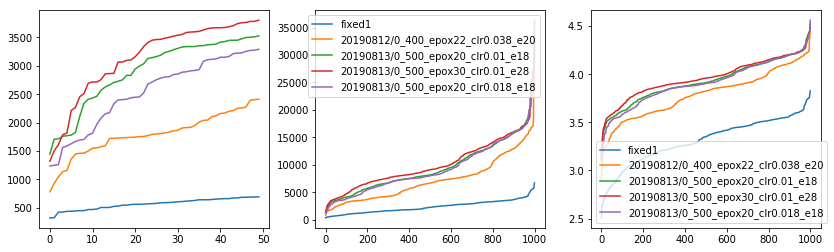

In [2]:
# Use ax to choose hyperparameters
results = []
names = ['fixed1.npz',
         '20190812/0_400_epox22_clr0.038_e20.npz',
         '20190813/0_500_epox20_clr0.01_e18.npz',
         '20190813/0_500_epox30_clr0.01_e28.npz',
         '20190813/0_500_epox20_clr0.018_e18.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

My hand picked parameters `(epochs=30, lr=(0.01, 0.2), decay=1e-3)` are superior to the one picked by ax `(epochs=20, lr=(0.018, 0.5), decay=4.3e-4)`.

400-500 games lasted slightly longer than before, and the trained models are significantly stronger than the previous. Nearly double the score in the first 5% of games!!

## Games 600
Generated by `20190813/0_500_epox30_clr0.01_e28.npz`

(4, 1000)


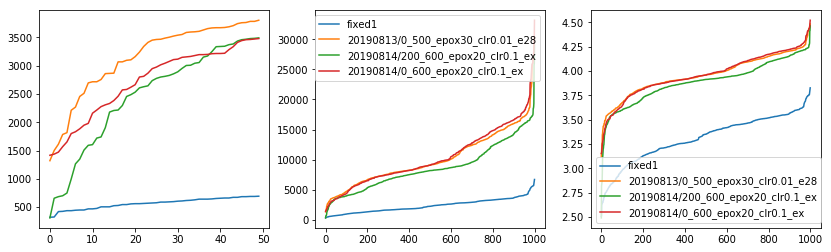

In [4]:
results = []
names = ['fixed1.npz',
         '20190813/0_500_epox30_clr0.01_e28.npz',
         '20190814/200_600_epox20_clr0.1_ex.npz',
         '20190814/0_600_epox20_clr0.1_ex.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

New training did not beat old training. Need to pick different parameters.
* b4096 vs b1024  (won't change)
* d1e-4 vs d1e-3  (try)
* clr0.1-1.0 vs clr0.01-0.2  (should be ok)
* e20 vs e30  (try)

Using clr and lr range test allows quick hyperparameter tuning, but it still takes more work than just throwing everything at ax and letting it run an hour. The GPU is sitting idle anyway.

* Increasing decay back to 1e-3 didn't work (worse).
* Increasing epochs to 30 didn't work (worse).
* Lower lr to 0.01-0.2 didn't work (worse).
* Decreasing decay and decreasing epochs (worse)

I can't find better hyperparameters, so I have to go back to using ax.

Ax could not find any better hyperparameters. I was also not able to get good performance with manual testing. The only solution was to decrease the batch size back to 1024. This was able to solve my playing strength problem. The control model (using similar HPs as the previous model) has similar early game performance but is getting stronger in the late game. I think if I optimize the HPs a bit, I can also get the early game stronger as well.

(5, 1000)


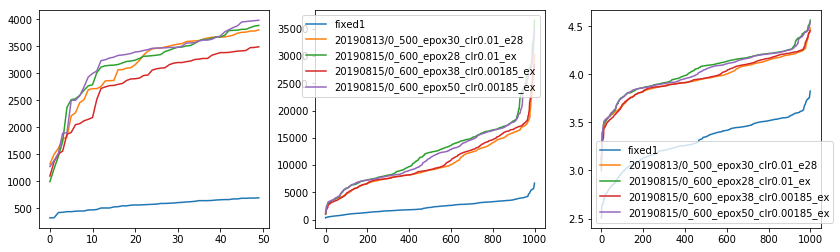

In [6]:
results = []
names = ['fixed1.npz',
         '20190813/0_500_epox30_clr0.01_e28.npz',
         '20190815/0_600_epox28_clr0.01_ex.npz',
         '20190815/0_600_epox38_clr0.00185_ex.npz',
         '20190815/0_600_epox50_clr0.00185_ex.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

(4, 1000)


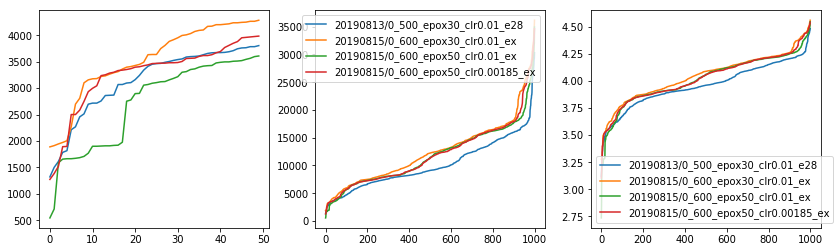

In [10]:
results = []
names = ['20190813/0_500_epox30_clr0.01_e28.npz',
         '20190815/0_600_epox30_clr0.01_ex.npz',
         '20190815/0_600_epox50_clr0.01_ex.npz',
         '20190815/0_600_epox50_clr0.00185_ex.npz',
         ]
for name in names:
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    results.append(scores)
names=[name[:-4] for name in names]
results = np.vstack(results)
print(results.shape)
logresults = np.log10(results + 1)

plt.subplots(figsize=(14, 4))
plt.subplot(131)
for i in range(len(results)):
    plt.plot(results[i][:50])
plt.subplot(132)
for i in range(len(results)):
    plt.plot(results[i])
plt.legend(names)
plt.subplot(133)
for i in range(len(logresults)):
    plt.plot(logresults[i])
plt.legend(names)
plt.show()

Handpicked network (using same HRs as last run) are slightly superior to the ax optimized one.

## Games 700
Generated by `20190815/0_600_epox30_clr0.01_ex`

(3, 1000)


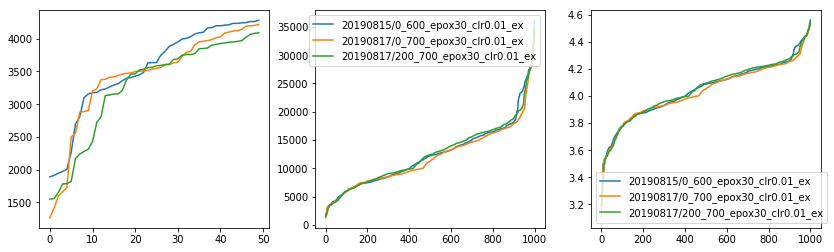

In [10]:
names = [
         '20190815/0_600_epox30_clr0.01_ex.npz',
         '20190817/0_700_epox30_clr0.01_ex.npz',
         '20190817/200_700_epox30_clr0.01_ex.npz',
         ]
draw_plots(names)

Training with same parameters did not give stronger networks. The network trained on all 700 games is slightly stronger in the beginning, but weaker than the 200-700 model in the late game. Need to adjust hyperparameters to see if I can get stronger networks: try longer train times and less decay. If nothing works, may be worth trying larger models. How to know when I've hit the capacity of a model?

(3, 1000)


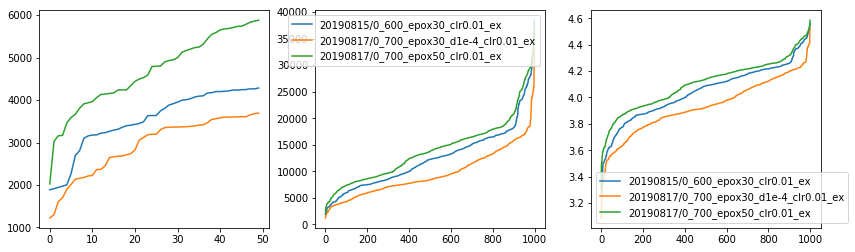

In [8]:
names = [
         '20190815/0_600_epox30_clr0.01_ex.npz',
         '20190817/0_700_epox30_d1e-4_clr0.01_ex.npz',
         '20190817/0_700_epox50_clr0.01_ex.npz',
         ]
draw_plots(names)

Lower decay had worse performance. Higher epochs had better performance.

(4, 1000)


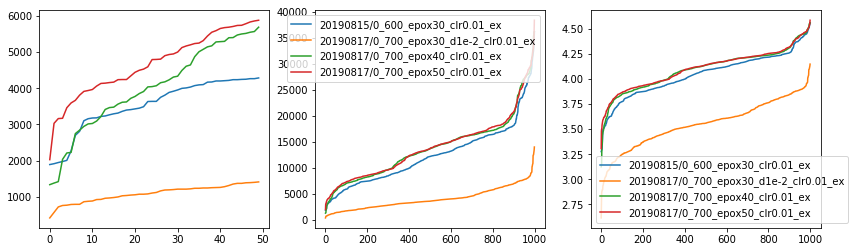

In [12]:
names = [
         '20190815/0_600_epox30_clr0.01_ex.npz',
         '20190817/0_700_epox30_d1e-2_clr0.01_ex.npz',
         '20190817/0_700_epox40_clr0.01_ex.npz',
         '20190817/0_700_epox50_clr0.01_ex.npz',
         ]
draw_plots(names)

Increasing the decay is also worse: decay=0.001 seems to be optimal here. epox40 is inferior to epox50. 

(3, 1000)


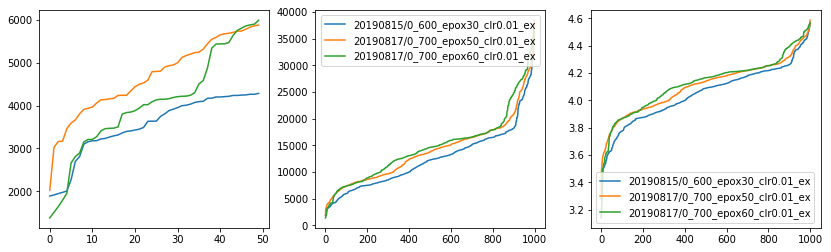

In [23]:
names = [
         '20190815/0_600_epox30_clr0.01_ex.npz',
         '20190817/0_700_epox50_clr0.01_ex.npz',
         '20190817/0_700_epox60_clr0.01_ex.npz',
         ]
draw_plots(names)

Training for longer epochs (60) gives stronger performance later, but the initial 5% is weaker. Despite being weaker overall, I will choose the epox50 model because it has stronger initial performance. Also both models are marginally stronger than the previous model everywhere, so there is iterative improvement.

### Games 700-800 failed
When using `20190817/0_700_epox50_clr0.01_ex.npz`. Is this network actually not as strong, or is it just unlucky?

(4, 1000)


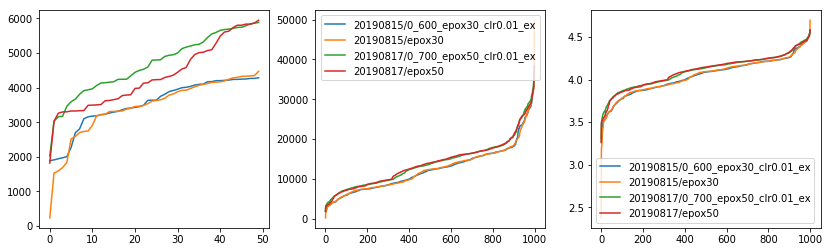

New model is clearly stronger. Not sure why selfplay results were poor


In [8]:
names = ['20190815/0_600_epox30_clr0.01_ex.npz',
         '20190815/epox30.npz',         
         '20190817/0_700_epox50_clr0.01_ex.npz',
         '20190817/epox50.npz',
         ]
draw_plots(names)
print('New model is clearly stronger. Not sure why selfplay results were poor')

(3, 1000)


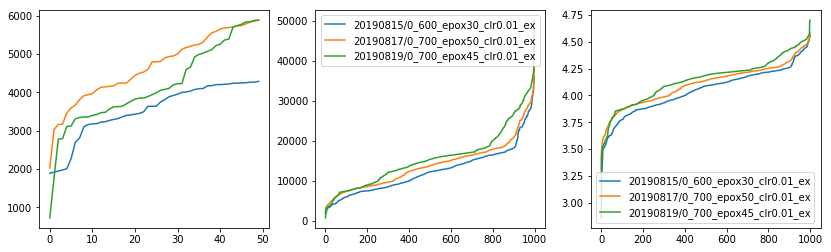

epox45 is much stronger later on, but slightly weaker initially. I will use epox45 to redo games 800


In [31]:
names = ['20190815/0_600_epox30_clr0.01_ex.npz',         
         '20190817/0_700_epox50_clr0.01_ex.npz',    
         '20190819/0_700_epox45_clr0.01_ex.npz',
         ]
draw_plots(names)
print('epox45 is much stronger later on, but slightly weaker initially. I will use epox45 to redo games 800')

(2, 1000)


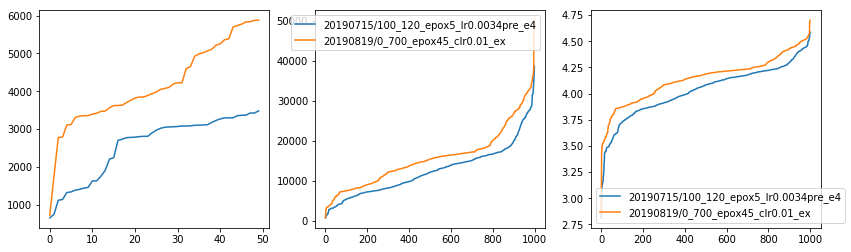

In [30]:
names = ['20190715/100_120_epox5_lr0.0034pre_e4.npz',  
         '20190819/0_700_epox45_clr0.01_ex.npz',
         ]
draw_plots(names)

The networks trained using min-move-dead are now much stronger than those trained using max-mean-log. This is mostly because I can generate selfplay games much faster, and the larger dataset produces stronger models. Unfortunately the min-move-dead playing strategy is weaker and does not maximize the playing score. It is very conservative and cannot take advantage of certain medium-probability opportunities.

### Games 700-800 passed
Using `20190819/0_700_epox45_clr0.01_ex.npz`.

(3, 1000)


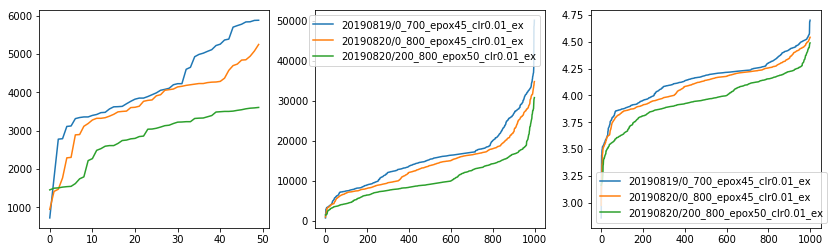

FAIL


In [11]:
names = [         
         '20190819/0_700_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox45_clr0.01_ex.npz',
         '20190820/200_800_epox50_clr0.01_ex.npz',
         ]
draw_plots(names)
print('FAIL')

(4, 1000)


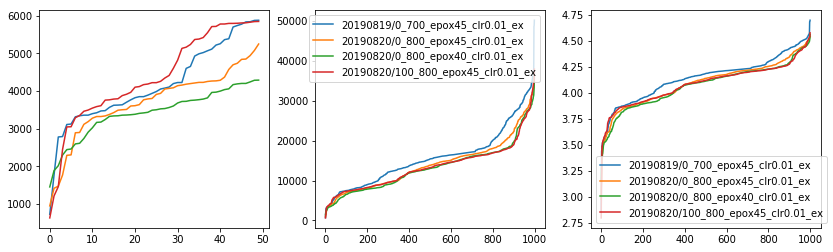

FAIL


In [13]:
names = [         
         '20190819/0_700_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox40_clr0.01_ex.npz',
         '20190820/100_800_epox45_clr0.01_ex.npz',
         ]
draw_plots(names)
print('FAIL')

Perhaps I should change my goal to selecting networks that are strong at every time step, rather than just at the beginning.

(5, 1000)


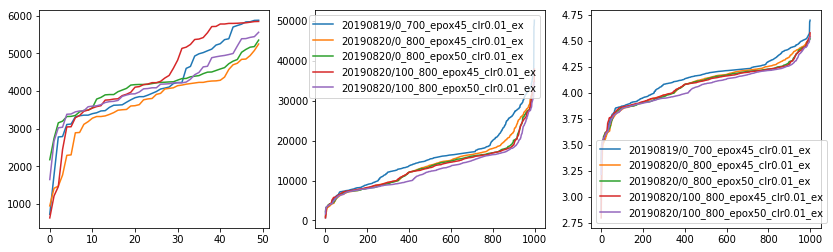

FAIL


In [18]:
names = [         
         '20190819/0_700_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox50_clr0.01_ex.npz',
         '20190820/100_800_epox45_clr0.01_ex.npz',
         '20190820/100_800_epox50_clr0.01_ex.npz',
         ]
draw_plots(names)
print('FAIL')

(5, 1000)


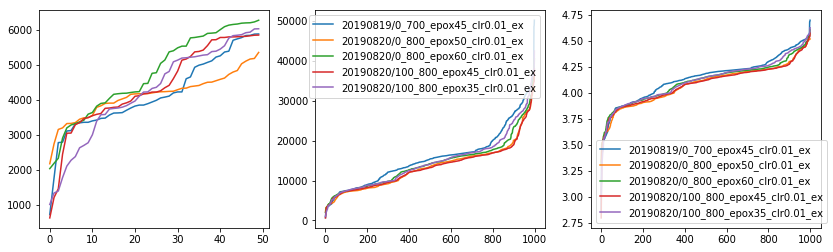

FAIL, but 0_800_epox60 is stronger in the inital 5%


In [22]:
names = [         
         '20190819/0_700_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox50_clr0.01_ex.npz',
         '20190820/0_800_epox60_clr0.01_ex.npz',
         '20190820/100_800_epox45_clr0.01_ex.npz',
         '20190820/100_800_epox35_clr0.01_ex.npz',
         ]
draw_plots(names)
print('FAIL, but 0_800_epox60 is stronger in the inital 5%')

(5, 1000)


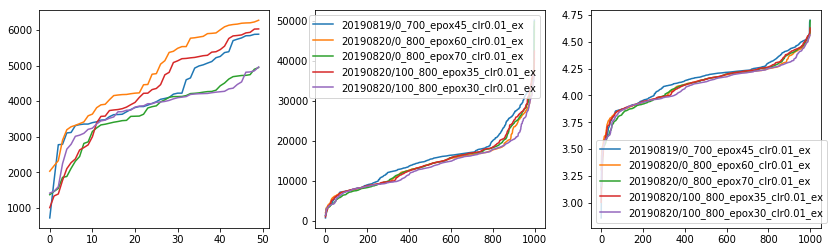

FAIL, but 0_800_epox60 is stronger in the inital 5%


In [25]:
names = [         
         '20190819/0_700_epox45_clr0.01_ex.npz',
         '20190820/0_800_epox60_clr0.01_ex.npz',
         '20190820/0_800_epox70_clr0.01_ex.npz',
         '20190820/100_800_epox35_clr0.01_ex.npz',
         '20190820/100_800_epox30_clr0.01_ex.npz',
         ]
draw_plots(names)
print('FAIL, but 0_800_epox60 is stronger in the inital 5%')

(5, 1000)


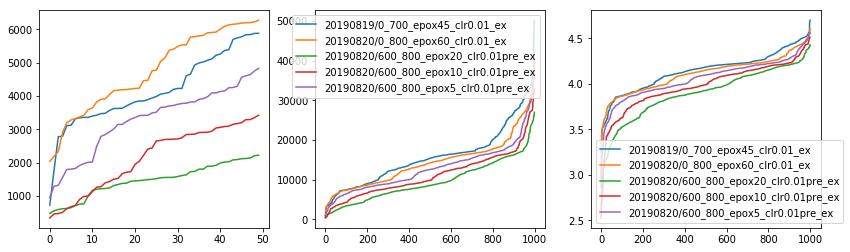

FAIL


In [27]:
# Try fine-tuning the strong model from last round
names = [         
    '20190819/0_700_epox45_clr0.01_ex.npz',
    '20190820/0_800_epox60_clr0.01_ex.npz',
    '20190820/600_800_epox20_clr0.01pre_ex.npz',
    '20190820/600_800_epox10_clr0.01pre_ex.npz',
    '20190820/600_800_epox5_clr0.01pre_ex.npz',
]
draw_plots(names)
print('FAIL')

(4, 1000)


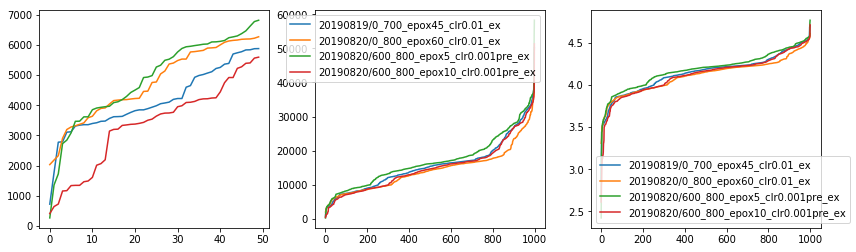

PASS: fine tuning 600-800 with a very small lr


In [30]:
# Try fine-tuning the strong model from last round
names = [         
    '20190819/0_700_epox45_clr0.01_ex.npz',
    '20190820/0_800_epox60_clr0.01_ex.npz',
    '20190820/600_800_epox5_clr0.001pre_ex.npz',
    '20190820/600_800_epox10_clr0.001pre_ex.npz',
]
draw_plots(names)
print('PASS: fine tuning 600-800 with a very small lr')

(4, 1000)


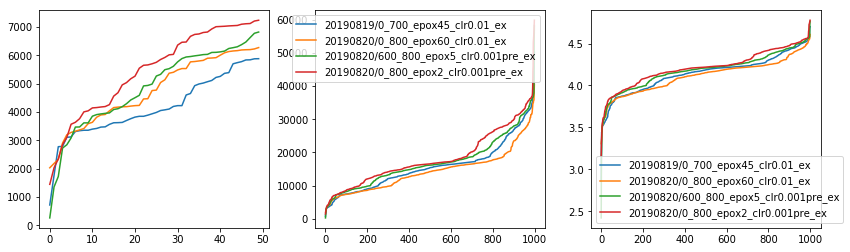

PASS: fine tuning 0-800 with an lr drop
The effect is due to lr drop, not limiting to only the last 200 games


In [34]:
# Is the effect the fine tuning or the lr drop?
names = [         
    '20190819/0_700_epox45_clr0.01_ex.npz',
    '20190820/0_800_epox60_clr0.01_ex.npz',
    '20190820/600_800_epox5_clr0.001pre_ex.npz',
    '20190820/0_800_epox2_clr0.001pre_ex.npz',
]
draw_plots(names)
print('PASS: fine tuning 0-800 with an lr drop')
print('The effect is due to lr drop, not limiting to only the last 200 games')

(5, 1000)


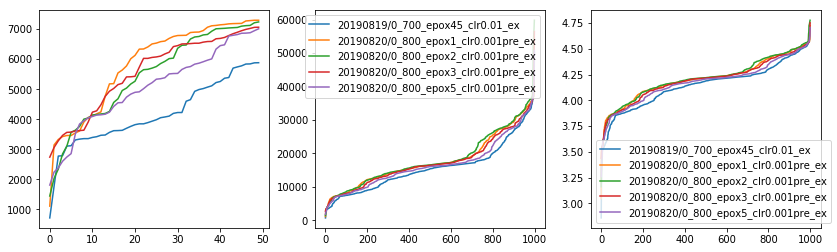

PASS: fine tuning 0-800 with an lr drop
The effect is due to lr drop, not limiting to only the last 200 games


In [65]:
# Note: I am not using clr for these fine tuning experiments. Fixed lr=1e-3
names = [         
    '20190819/0_700_epox45_clr0.01_ex.npz',
    '20190820/0_800_epox1_clr0.001pre_ex.npz',
    '20190820/0_800_epox2_clr0.001pre_ex.npz',
    '20190820/0_800_epox3_clr0.001pre_ex.npz',
    '20190820/0_800_epox5_clr0.001pre_ex.npz',
]
draw_plots(names)
print('PASS: fine tuning 0-800 with an lr drop')
print('The effect is due to lr drop, not limiting to only the last 200 games')

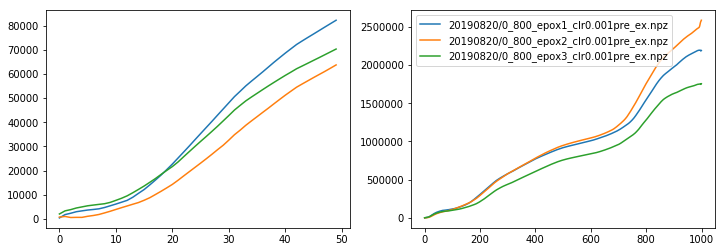

In [56]:
names = [         
    '20190819/0_700_epox45_clr0.01_ex.npz',
    '20190820/0_800_epox1_clr0.001pre_ex.npz',
    '20190820/0_800_epox2_clr0.001pre_ex.npz',
    '20190820/0_800_epox3_clr0.001pre_ex.npz',
]
cumsum = []
for i, name in enumerate(names):
    dist = np.load(name)
    scores = np.asarray([dist['scores']]).flatten()
    scores.sort()
    if i == 0:
        baseline = np.cumsum(scores)
    else:
        cumsum.append(np.cumsum(scores) - baseline)

plt.figure(figsize=(12,4))
plt.subplot(121)
for cdf in cumsum:
    plt.plot(cdf[:50])
plt.subplot(122)
for cdf in cumsum:
    plt.plot(cdf)
plt.legend(names[1:])

Fine tuning 1 epoch is stronger in the first 5% but slightly weaker in the late game compared to 2 epochs. However, despite theses models reaching 60k score in a few out of 1000 games, this score is never reached in selfplay. This is because the search is stopped when the first line dies. But why is the search strategy weaker than pure play using the network? Presumable the searched moves should be stronger, and that is why we train on them.

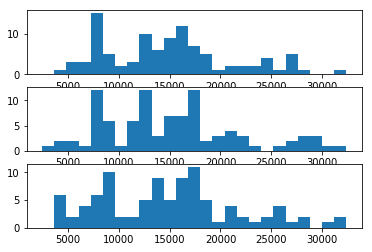

In [76]:
scores = np.load('20190819/0_700_epox45_clr0.01_ex.npz')['scores']
xlim = (2456, 32388)
plt.subplot(311)
plt.hist(np.random.choice(scores, 100, replace=False), range=xlim, bins=25);
plt.subplot(312)
plt.hist(np.random.choice(scores, 100, replace=False), range=xlim, bins=25);
plt.subplot(313)
plt.hist(np.random.choice(scores, 100, replace=False), range=xlim, bins=25);

The min-move strategy plays very conservatively. It does reduce the chance of dying early, but at the cost of not reaching higher scoring games.